<h1 style="text-align: center; font-size: 46px; color: Orange;">Titanic Survival Machine Learning</h1>
<div style="text-align: center;">
    <img src="download.jpeg" alt="Sample Image" style="width:800px;height:300px;">
</div>

<h1 style="text-align: left; font-size: 36px; color: Orange;">Table of Contents</h1>

<div class="table">
<ul>
    <li><a href="#Data-Wrangling">Data Wrangling</a>
    <li><a href="#Exploratory-Data-Analysis">Exploratory Data Analysis</a></li>
    <li><a href="#Model-Development">Model Development</a></li>
     <li><a href="#Making-a-prediction-with-Test-file"> Making a prediction with Test file</a></li>
   
</ul>
</div>
<hr>

<h1 style="text-align: left; font-size: 36px; color: lightGreen;">Data Wrangling</h1>

In [70]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [71]:
df = pd.read_csv('train.csv')

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [74]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<h1 style="text-align: left; font-size: 36px; color: lightGreen;">Data Wrangling</h1>

### Handling missing values

In [75]:
missing_count_per_column = df.isna().sum()
missing_value_column = missing_count_per_column[missing_count_per_column>0]
print(f'List of featurs with missing values:\n{missing_value_column}')

List of featurs with missing values:
Age         177
Cabin       687
Embarked      2
dtype: int64


In [76]:
df.replace(['','?','N/A','0','n/a','N/a'], np.nan, inplace=True) 

In [77]:
# Replacing missing Age values with mean of the Age feature
df['Age']= df['Age'].replace(np.nan , df['Age'].astype(float).mean(axis = 0))

In [78]:
# Droping Cabin feature as it contain majority of null values
df = df.drop(columns=['Cabin'])

In [79]:
# Replacing missing Embarked values with mode of the Embarked feature
df['Embarked'] = df['Embarked'].replace(np.nan, df['Embarked'].mode()[0])

<h1 style="text-align: left; font-size: 36px; color: lightGreen;">Exploratory Data Analysis</h1>

In [80]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [81]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

## Creating Bins for Age and Fare Features

In [82]:
#Creatin bins for Fare feature
fare_bins = [0, 8, 15, 31, 513]
fare_labels = ['Economy', 'Lower-Middle', 'Upper-Middle', 'High']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

#Creating bins for Age feature
bins = [0, 12, 18, 60, 81]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

## Plotting for Survival Insights

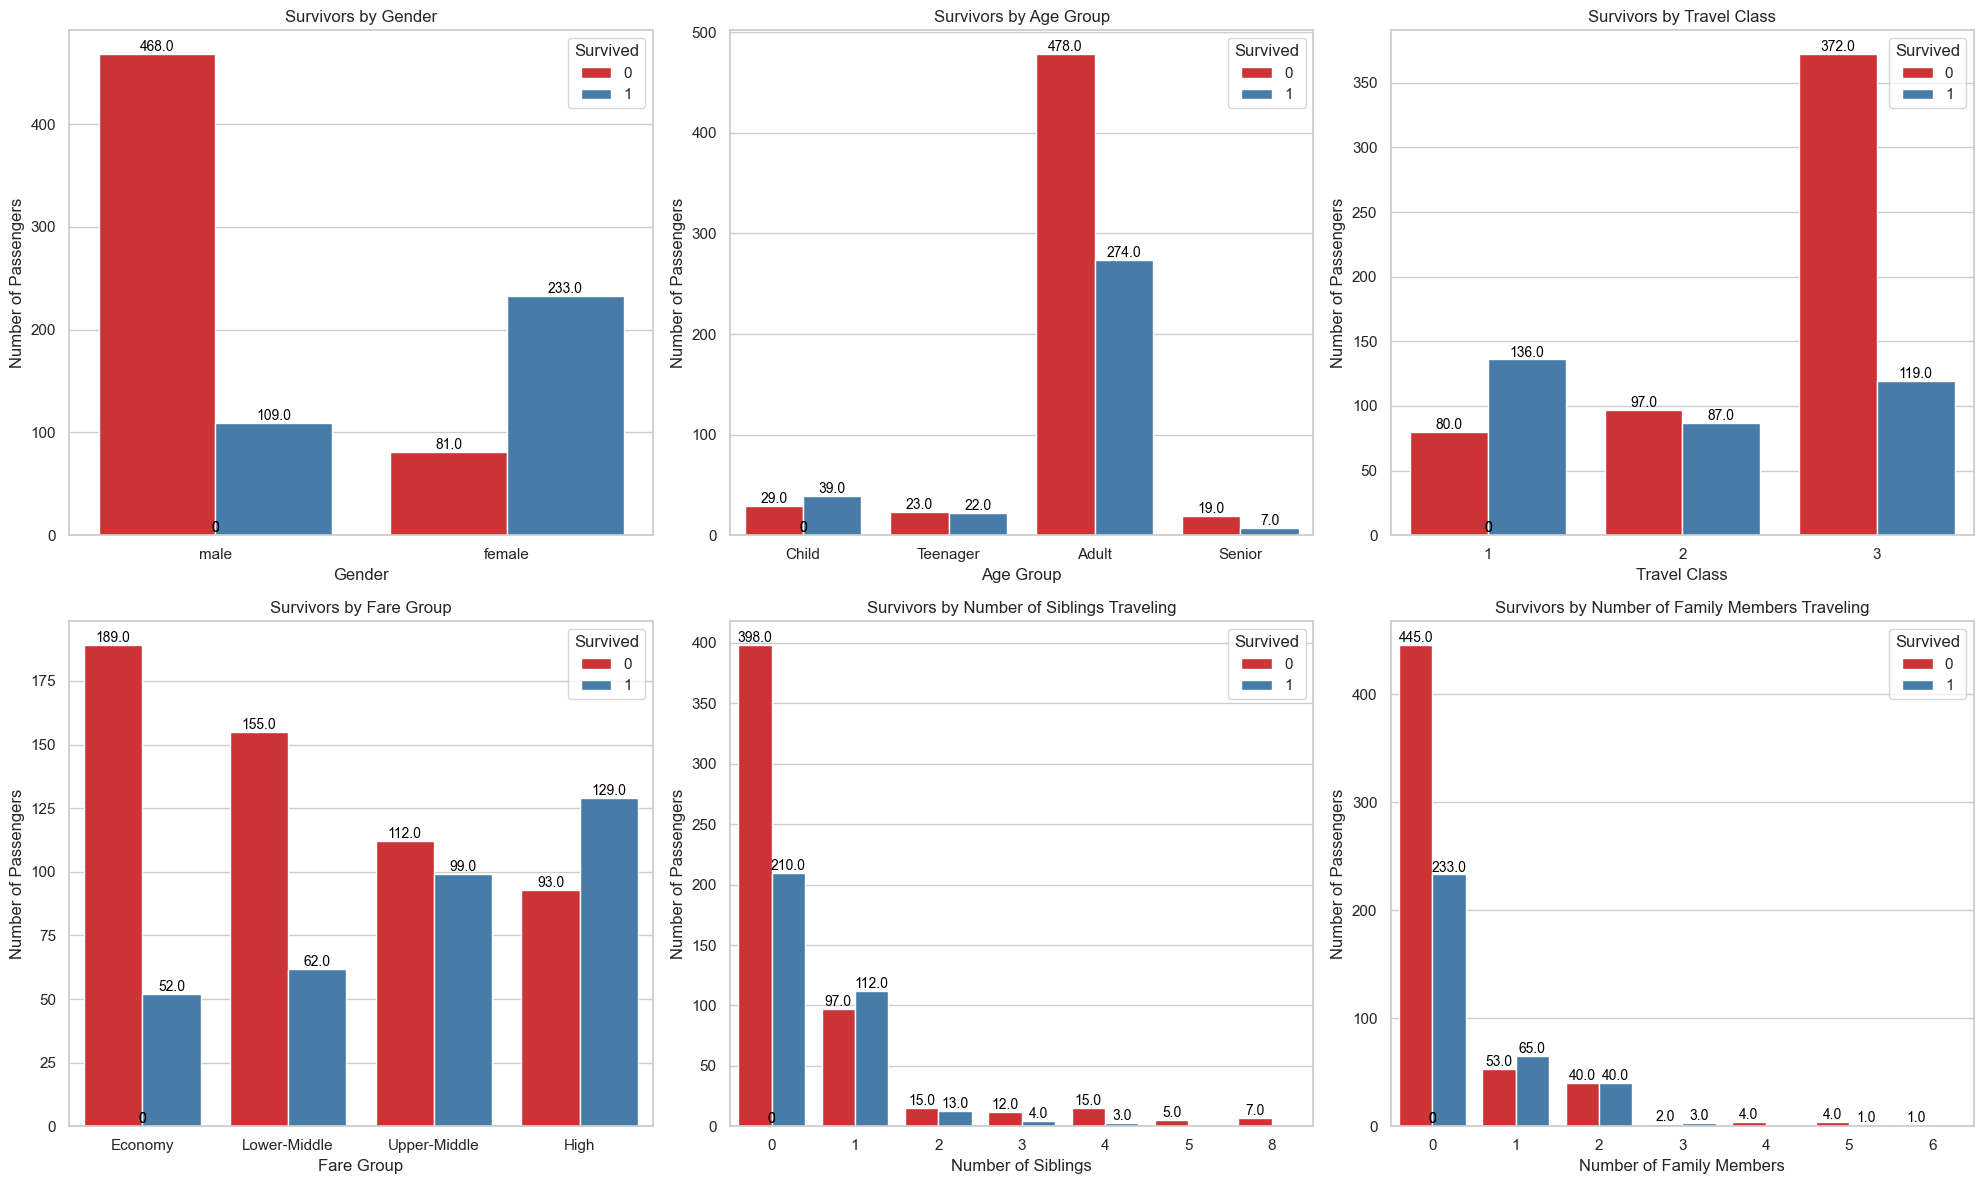

In [83]:
sns.set(style='whitegrid')

# Create a 2x3 grid for 6 bar charts
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot 1: Count of passengers by Sex
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1', ax=axes[0, 0])
axes[0, 0].set_ylabel('Number of Passengers')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_title('Survivors by Gender')
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                        fontsize=10, color='black')

# Plot 2: Count of survivors by AgeGroup
sns.countplot(data=df, x='AgeGroup', hue='Survived', palette='Set1', ax=axes[0, 1])
axes[0, 1].set_ylabel('Number of Passengers')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_title('Survivors by Age Group')
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                        fontsize=10, color='black')

# Plot 3: Count of survivors by Travel Class
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1', ax=axes[0, 2])
axes[0, 2].set_ylabel('Number of Passengers')
axes[0, 2].set_xlabel('Travel Class')
axes[0, 2].set_title('Survivors by Travel Class')
for p in axes[0, 2].patches:
    axes[0, 2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                        fontsize=10, color='black')

# Plot 4: Count of survivors by FareGroup
sns.countplot(data=df, x='FareGroup', hue='Survived', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_ylabel('Number of Passengers')
axes[1, 0].set_xlabel('Fare Group')
axes[1, 0].set_title('Survivors by Fare Group')
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                        fontsize=10, color='black')

# Plot 5: Survivors by Number of Siblings
sns.countplot(data=df, x='SibSp', hue='Survived', palette='Set1', ax=axes[1, 1])
axes[1, 1].set_ylabel('Number of Passengers')
axes[1, 1].set_xlabel('Number of Siblings')
axes[1, 1].set_title('Survivors by Number of Siblings Traveling')
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                        fontsize=10, color='black')

# Plot 6: Survivors by Number of Family Members
sns.countplot(data=df, x='Parch', hue='Survived', palette='Set1', ax=axes[1, 2])
axes[1, 2].set_ylabel('Number of Passengers')
axes[1, 2].set_xlabel('Number of Family Members')
axes[1, 2].set_title('Survivors by Number of Family Members Traveling')
for p in axes[1, 2].patches:
    axes[1, 2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                        fontsize=10, color='black')

plt.tight_layout()

plt.show()

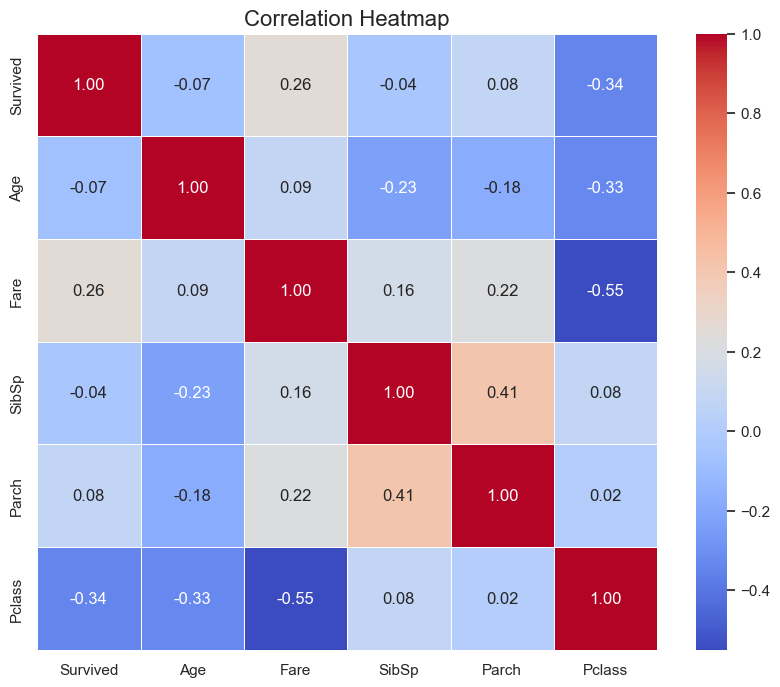

In [84]:
#Correlations Heatmap
corr = df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'Pclass']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

<h1 style="text-align: left; font-size: 36px; color: lightGreen;">Model Development</h1>

<h2>Choosing Random Forest for Survival Prediction</h2>
<ul>
    <li><strong>Handles Uncorrelated Features</strong> - It handles uncorrelated features well by building multiple decision trees.</li>
    <li><strong>Uses Key Features for Accurate Predictions</strong></li>
</ul>


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in ['Sex', 'AgeGroup', 'FareGroup']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df[['Sex', 'AgeGroup', 'Pclass', 'FareGroup', 'SibSp', 'Parch']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model Initialization
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

## Model Evaluation

In [86]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Making a Prediction for a Sample Passenger

In [87]:
sample_passenger = pd.DataFrame({
    'Sex': [label_encoders['Sex'].transform(['female'])[0]],
    'AgeGroup': [label_encoders['AgeGroup'].transform(['Adult'])[0]],
    'Pclass': [1],
    'FareGroup': [label_encoders['FareGroup'].transform(['High'])[0]],
    'SibSp': [1],
    'Parch': [0]
})

survival_prediction = rf_model.predict(sample_passenger)
print("\nSurvival Prediction for the sample passenger:", "Survived\n" if survival_prediction[0] == 1 else "Not Survived\n")


Survival Prediction for the sample passenger: Survived



<h1 style="text-align: left; font-size: 36px; color: lightGreen;">Making a Prediction with Test File</h1>

In [88]:
test_df = pd.read_csv('test.csv')

In [89]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Standardization to Match the Model Input

In [90]:
#Creatin bins for Fare feature
fare_bins = [0, 8, 15, 31, 513]
fare_labels = ['Economy', 'Lower-Middle', 'Upper-Middle', 'High']
test_df['FareGroup'] = pd.cut(test_df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

#Creating bins for Age feature
bins = [0, 12, 18, 60, 81]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

# Encode categorical features
label_encoders = {}
for column in ['Sex', 'AgeGroup', 'FareGroup']:
    le = LabelEncoder()
    test_df[column] = le.fit_transform(test_df[column])
    label_encoders[column] = le

In [91]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareGroup,AgeGroup
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,2,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,2,0


In [92]:
test_data = test_df[['Sex','AgeGroup','Pclass','FareGroup','SibSp','Parch']]
test_df['Survived'] = np.nan

survival_prediction = rf_model.predict(test_data)

for i in range(len(test_data)):
    if survival_prediction[i] == 1:
        test_df.at[i, 'Survived'] = '1'
    else:
        test_df.at[i, 'Survived'] = '0'
    i+=1

In [93]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareGroup,AgeGroup,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,2,2,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,2,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,2,0,0
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S,2,3,0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q,0,0,1
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S,3,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C,0,0,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S,3,0,0


## Saving Prediction to a File

In [94]:
submission_df = test_df[['PassengerId', 'Survived']]
submission_df.to_csv('Gender_submission.csv', index=False)